<a href="https://colab.research.google.com/github/blabossiere/cap-comp215/blob/main/lessons/week03-objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes and Objects
Our week 3 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [1]:
import math
import random
from collections import defaultdict

import matplotlib.pyplot as plt
from pprint import pprint

### Everything in `python` is an `object`!
  * and every `object` has a `type`!
    * use `type(object)` to learn the type of an object
    * a `class` is used to define a `type`!
  * even a `function` is an `object` !!
  * an `object` has attributes, you can just add new attributes to any object (but don't!)

A little code to demonstrate...

In [30]:
# demo code
type(42)
type(42.5)
type("42.5")
type(["42.5"])
type(("42.5",))
type({'the answer is:' '42',}) # why is this a set and what makes it a dictionary?
# type(zip)
# type(int)
# type(range)

def foo():
  pass

type(foo)

class Foo:
  pass

type(Foo)
f = Foo()
type(Foo), type(f)
type(zip), type(zip())
type(zip), type(zip((1, 2), ('a', 'b')))
type(str), type("hello")
# print(zip((1, 2), ('a', 'b')))
# print(0x7ba9bec43e00)
bool([]) # bool of an empty list

False

In [ ]:
"""

push(item) -> None
pop() -> item
top( -> item)

"""

In [55]:
class Stack:
  """ A stack type that implements classic stack operations"""
  def __init__(self):
    print("Initialize")
    self._items = []

  def __lt__(self,other):
    """return True if this stack is shorter than the other stack."""
    return len(self._items) < len(other._items)

  def push(self, item):
    """ push the item onto the top of the stack (mutator) """
    self._items.append(item)

  def pop(self):
    """ remove the item from the top of the stack and return it"""
    return self._items.pop()

  def top(self):
    """ examine the top of the stack and return the item without removing it"""
    return self._items[-1]

  def is_empty(self):
    """ return True if there are no elements in the stack """
    return len(self._items) == 0
    # return not bool(self.items)

s = Stack()
s.push(42)
s.push(99)
s.push(101)
s.pop()
s.top()
s.is_empty()
t = Stack()
t.is_empty(), s.is_empty()
t.top()
t < s

t.__lt__(s), t < s
int.__lt__(42, 99), 42 < 99

assert s.top() == 101
assert s.pop() == 101
assert s.top() == 99
assert not s.is_empty()
assert t.is_empty()
assert s < t
print("tests pass")
type(int), type(Stack)

# s = Stack()
# type(s)
# Stack.is_empty(s)
# s.is_empty()
# t = Stack()
# t.is_empty(), s.is_empty()

# t = Turtle()
# t.left()


Initialize
Initialize


IndexError: list index out of range

## Problem: Collision detection using circles
A `class` is just a collection of `functions` that all work on the same piece of `data structure`.

The `data structure` is defined by the class's `instance variables`.

Easiest to understand if we do an example - let's define a `Circle` object type...

In [3]:
class Circle:
    """ Representation for the data and operations on a circle """

    def area(self):
        """ Return the area of this circle """

    def move(self, offset):
        """ Move this circle by given (x,y) offset """

    def distance(self, other):
        """ Return the distance between this circle and the other one """

    def intersects(self, other):
        """ Return True iff this circle intersects the other one """


In [4]:
# Test Circle class


## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


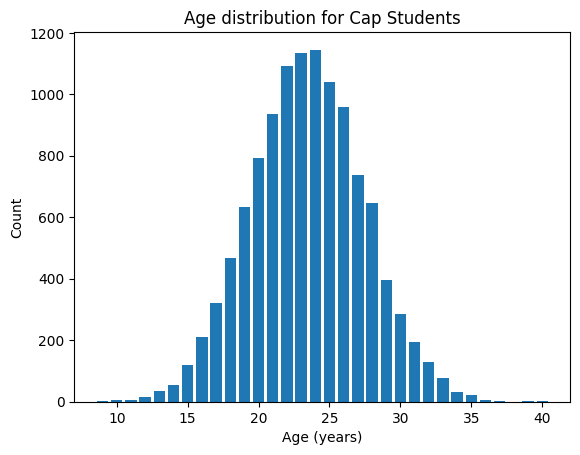

In [5]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# count the number of students in each age class
histogram = {}
for age in data:
    histogram[age] = histogram.get(age, 0) + 1

# configure a plot to draw the bar chart in
_, ax = plt.subplots()
ax.set(
    title="Age distribution for Cap Students",
    xlabel='Age (years)',
    ylabel='Count',
)

# plot a histogram of the data, divided into n "equal width" bins
ax.bar(histogram.keys(), histogram.values())
plt.show()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [6]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

### The Power of Abstraction

The real benefits appear when we go to use this class to solve the original problem.

Notice how creating an "abstraction" for a histogram makes it much easier to understand what the computation is doing.  Also notice, the class is "reusable" - we can now deploy this abstraction any time we need a histogram!

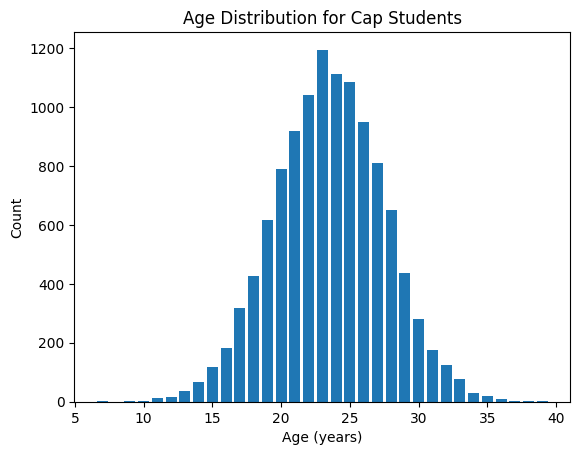

In [7]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()